In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [9]:
import nci_eval.metrics as metrics

In [26]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [11]:
def f1_score(tpr, prec):
    return 2.0 * tpr * prec / (tpr + prec)

In [12]:
def f1_score_positive_prior(tpr, fpr, positive_prior):
    return f1_score(tpr, metrics.precision_from_tpr_fpr(tpr, fpr, positive_prior))

In [56]:
def plot_f1_score(cls_one_tpr, cls_one_fpr, cls_two_tpr, cls_two_fpr, positive_priors):
    
    classifier_one_f1 = [f1_score_positive_prior(cls_one_tpr, cls_one_fpr, pp) for pp in positive_priors]
    classifier_two_f1 = [f1_score_positive_prior(cls_two_tpr, cls_two_fpr, pp) for pp in positive_priors]
    
    plt.plot(positive_priors, classifier_one_f1, label='Classifier 1 TPR=%.1f FPR=%g' % (cls_one_tpr, cls_one_fpr), c='k')
    plt.plot(positive_priors, classifier_two_f1, label='Classifier 2 TPR=%.1f FPR=%g' % (cls_two_tpr, cls_two_fpr), c='k', linestyle='--')
    
    plt.title('Impact of Positive prevalence on F1 score')
    plt.xlabel('Positive prevalence ($\eta$)')
    plt.ylabel('F1 score')
    plt.semilogx()
    plt.legend()
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    

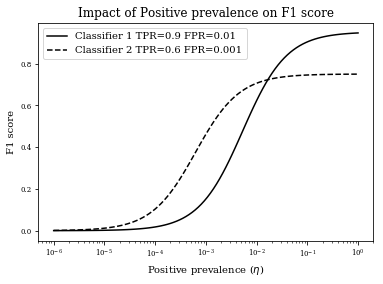

In [57]:
plot_f1_score(cls_one_tpr=0.9, cls_one_fpr=0.01, cls_two_tpr=0.6, cls_two_fpr=0.001, positive_priors=np.logspace(-6, 0, num=100))